In [16]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import gc
import random

from sklearn.model_selection import train_test_split

from tqdm.notebook import tqdm


In [18]:
articles_df=pd.read_csv('D://Education//MS DS NEU//Unsupervised Machine Learning//h-and-m-personalized-fashion-recommendations//articles.csv')
customers_df=pd.read_csv('D://Education//MS DS NEU//Unsupervised Machine Learning//h-and-m-personalized-fashion-recommendations//customers.csv')
transactions_df=pd.read_csv('D://Education//MS DS NEU//Unsupervised Machine Learning//h-and-m-personalized-fashion-recommendations//transactions_train.csv')


In [19]:
customers_df=customers_df.sample(frac=0.10)

In [20]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
734375,891171de2592fbe4d1d5c09a694b268cd308ada7f83fb1...,NaN,NaN,ACTIVE,NONE,24.0,aee32e697788553dbad8fffff2fc4c1278faeb420bf050...
770414,8fd1655f0af8c530e2706e5e563f1ee7c844edde3b04bb...,NaN,NaN,PRE-CREATE,NONE,NaN,29f0e37464a759ef9a157da521494148cd488382fac638...
1013971,bd35e47902dc058c4f1cf9f4c264ee588c53338f04441b...,NaN,NaN,PRE-CREATE,NONE,19.0,1588706dc4c3e2c8ee338ca3def9d552679c5c1872339c...
863807,a13ea3053c233562006a0a3f0f58ab0cb40162348202a2...,1.0,1.0,ACTIVE,Regularly,32.0,b4bbfeb1b55928e133eccac0851828e991baee5b81aa35...
195934,248684fd0ff51c7b4f26018c60678d3589541a04e31472...,1.0,1.0,ACTIVE,Regularly,61.0,59a37e84f84ff6935546f5ad0794188e8c0d0fa502efc2...


In [21]:
customers_df.customer_id


734375     891171de2592fbe4d1d5c09a694b268cd308ada7f83fb1...
770414     8fd1655f0af8c530e2706e5e563f1ee7c844edde3b04bb...
1013971    bd35e47902dc058c4f1cf9f4c264ee588c53338f04441b...
863807     a13ea3053c233562006a0a3f0f58ab0cb40162348202a2...
195934     248684fd0ff51c7b4f26018c60678d3589541a04e31472...
                                 ...                        
217418     289070ac2d9cf4baec74e3d316a62fc9985fe6fcbb1d9e...
1310895    f49c3c3a5e30a22e659415e7a7c93b302ca205b1058e39...
497439     5ce6933e055feb44f3470548f5e022453fb4ba784c3142...
177407     210748681cc91ae1d8b4c9dbaa40d55c8dac155d3cdc30...
1294208    f18666206b343f44113a9d5574457aac11ddd62e25cb73...
Name: customer_id, Length: 137198, dtype: object

In [22]:
customer_ids=customers_df.customer_id

In [23]:
customer_ids=list(customer_ids)
len(customer_ids)

137198

In [24]:
transactions_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


Drop Duplicates

In [25]:
transactions_df=transactions_df.drop_duplicates()

In [26]:
transactions_df

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [27]:
re=transactions_df['customer_id'].isin(customer_ids)

In [28]:
idx=list(re[re].index)

In [29]:
len(idx)

2892995

In [30]:
transaction_subset_df = transactions_df[re]

In [31]:
article_ids=list(transaction_subset_df.article_id.unique())

In [32]:
len(article_ids)

86307

In [33]:
re=articles_df['article_id'].isin(article_ids)
idx=list(re[re].index)

In [34]:
article_subset_df = articles_df[re]

In [35]:
article_subset_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [36]:
customers_df.to_csv('customers_subset.csv')
article_subset_df.to_csv('articles_subset.csv')
transaction_subset_df.to_csv('transaction_subset.csv')

### EDA

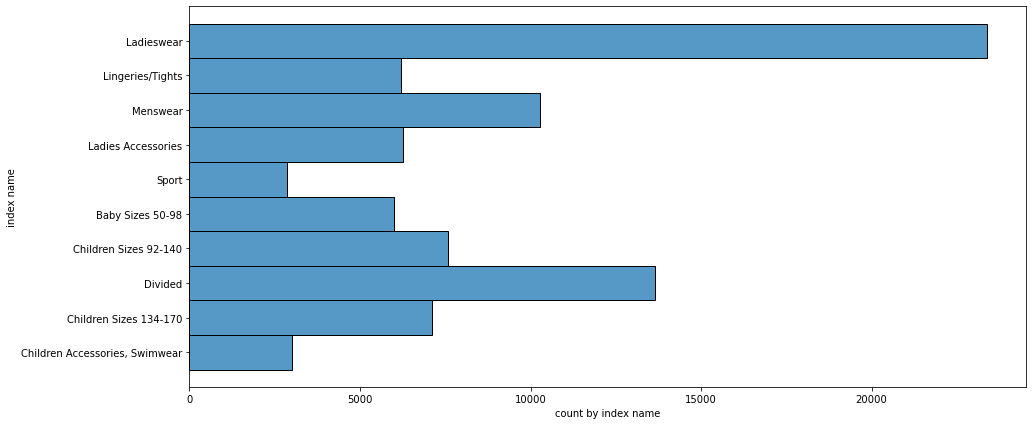

In [40]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=article_subset_df, y='index_name')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

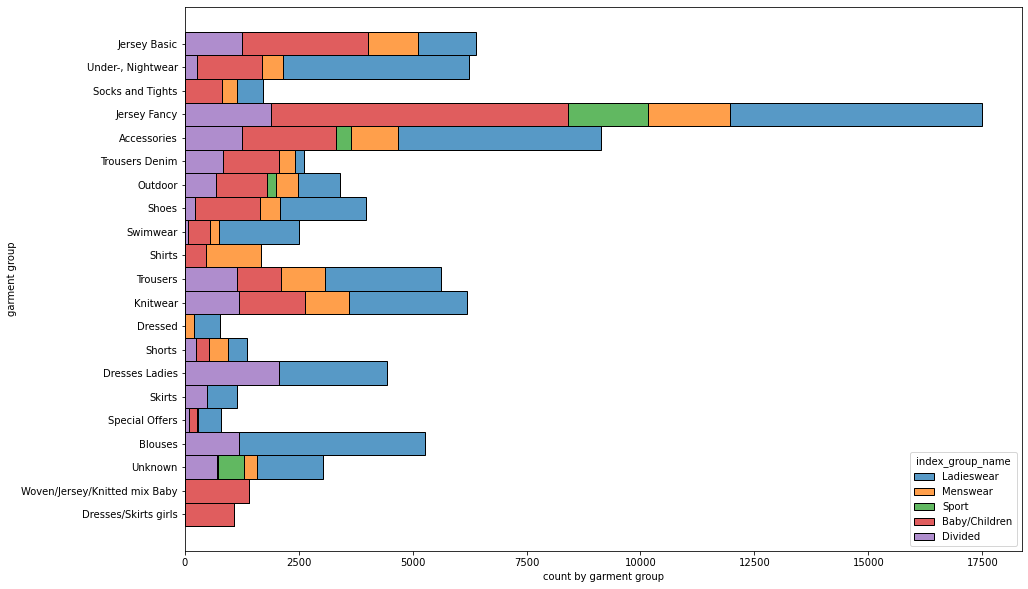

In [41]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.histplot(data=article_subset_df, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

In [42]:
article_subset_df.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   5995
                  Children Accessories, Swimwear     3007
                  Children Sizes 134-170             7099
                  Children Sizes 92-140              7590
Divided           Divided                           13637
Ladieswear        Ladies Accessories                 6265
                  Ladieswear                        23371
                  Lingeries/Tights                   6210
Menswear          Menswear                          10278
Sport             Sport                              2855
Name: article_id, dtype: int64

In [43]:
pd.options.display.max_rows = None
article_subset_df.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                5
                       Alice band                     6
                       Baby Bib                       3
                       Bag                         1077
                       Beanie                        32
                       Belt                         395
                       Bracelet                     139
                       Braces                         3
                       Bucket hat                     6
                       Cap                           11
                       Cap/peaked                   380
                       Dog Wear                      20
                       Earring                     1018
                       Earrings                      11
                       Eyeglasses                     2
                       Felt hat                       9
                       Giftbox                       11


In [44]:
for col in article_subset_df.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = article_subset_df[col].nunique()
        print(f'# of unique {col}: {un_n}')

# of unique prod_name: 39087
# of unique product_type_name: 128
# of unique product_group_name: 19
# of unique graphical_appearance_name: 30
# of unique colour_group_name: 50
# of unique perceived_colour_value_name: 8
# of unique perceived_colour_master_name: 20
# of unique department_name: 246
# of unique index_name: 10
# of unique index_group_name: 5
# of unique section_name: 56
# of unique garment_group_name: 21
# of unique detail_desc: 36908


In [45]:
data_postal = customers_df.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal.head()

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
17252,2c29ae653a9282cce4151bd87643c907644e09541abc28...,12089,4326,4011,11888,11536,11853
79436,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,33,15,15,33,33,33
60992,9d5787501bf1c77592156ba51eab13f4a2670c80768643...,20,6,6,20,19,19
35621,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,19,6,6,19,19,19
3260,087a46b65170845b4a55226ff1eb748ce7843d4b637cbe...,17,4,4,17,17,17


In [46]:
customers_df[customers_df['postal_code']=='2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'].head(5)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
631620,75dfa9dc9173058c6f3d4c405839ad4db4bc138ebe22a1...,1.0,1.0,ACTIVE,Regularly,60.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
92695,115277bf4705feaffb5b5c67ef07c1040908fec1364908...,NaN,NaN,ACTIVE,NONE,61.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
1086176,cab3e20ad54d6dd79c7c793fd947a668540ef6094b041b...,1.0,1.0,ACTIVE,Regularly,23.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
835228,9bebc6b08f888379b66c4e275dbcd416c31171c58256d1...,1.0,1.0,ACTIVE,Regularly,48.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
565531,69887e497e826d61c48112bd5bb5347db1a6b204d7470f...,NaN,NaN,ACTIVE,NONE,53.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


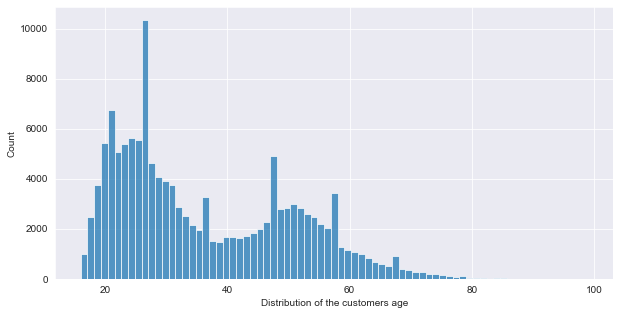

In [47]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers_df, x='age', bins=75)
ax.set_xlabel('Distribution of the customers age')
plt.show()

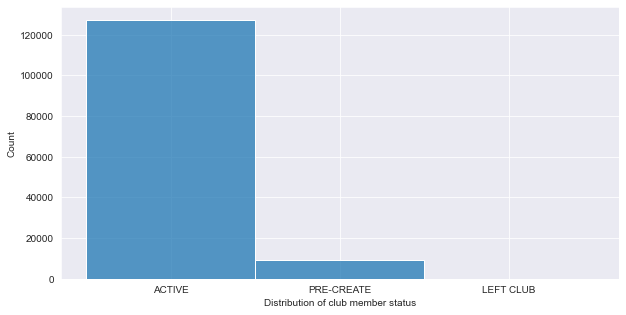

In [48]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers_df, x='club_member_status')
ax.set_xlabel('Distribution of club member status')
plt.show()

In [49]:
customers_df['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly'], dtype=object)

In [50]:
customers_df.loc[~customers_df['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'
customers_df['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

In [51]:
pie_data = customers_df[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count()

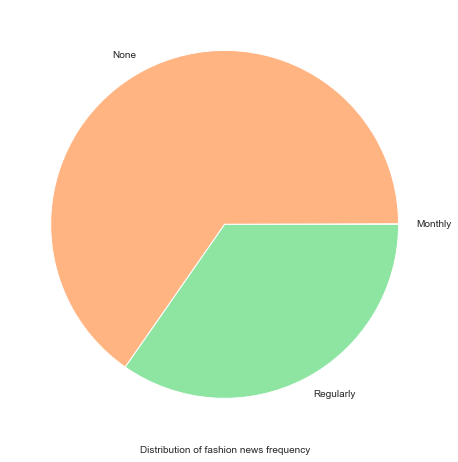

In [52]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15,8))
colors = sns.color_palette('pastel')
ax.pie(pie_data.customer_id, labels=pie_data.index, colors = colors)
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of fashion news frequency')
plt.show()

In [53]:
pie_data

,customer_id
fashion_news_frequency,
Monthly,74
None,89545
Regularly,47579


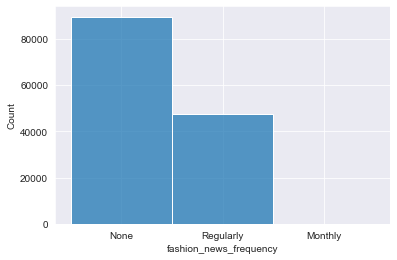

In [54]:
 ax = sns.histplot(data=customers_df, x='fashion_news_frequency')

In [55]:
pd.set_option('display.float_format', '{:.4f}'.format)
transaction_subset_df.describe()['price']

count   2892995.0000
mean          0.0277
std           0.0190
min           0.0001
25%           0.0155
50%           0.0254
75%           0.0339
max           0.5068
Name: price, dtype: float64

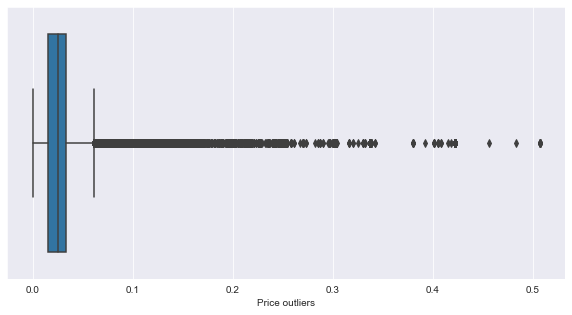

In [56]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=transaction_subset_df, x='price')
ax.set_xlabel('Price outliers')
plt.show()

In [57]:
transactions_byid = transaction_subset_df.groupby('customer_id').count()

In [58]:
transactions_byid.sort_values(by='price', ascending=False)['price'][:10]

customer_id
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    978
efaafb08a00e63ce561a67c31c1ab7e720d4f394a78c4705518dc02084a29172    789
e6498c7514c61d3c24669f49753dc83fdff3ec1ba13902dd9184c959d8f0b249    746
b0dfeed3ede47622bc0fedb867e17e29c702b53e928eb2996e6b4d792ec96550    713
8a9d4d7e454a745d3ac77645ca8afd7123b1f3d5d4e4bf6c7de13c9e7bc54f8e    703
4308983955108b3af43ec57f0557211e44462a5633238351fff14c8b51f16093    657
9478a9e051336b0373b07172ef96ed923cb50e0d54a7e3998250c9f5ccad2382    644
2351f0fa33dff45f29de0bc0f97067400b6df574652a4dc10fca68512f7ccd66    633
9facc7e5247374694a2cffe333d373abcb00545564326c3f78812d7d2e214e5c    628
62eb7f6a247863fa029692beaeefdee2c64b1c34c7e865b981b5a9947e416198    618
Name: price, dtype: int64

In [59]:
articles_for_merge = article_subset_df[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]

In [60]:
articles_for_merge = transaction_subset_df[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

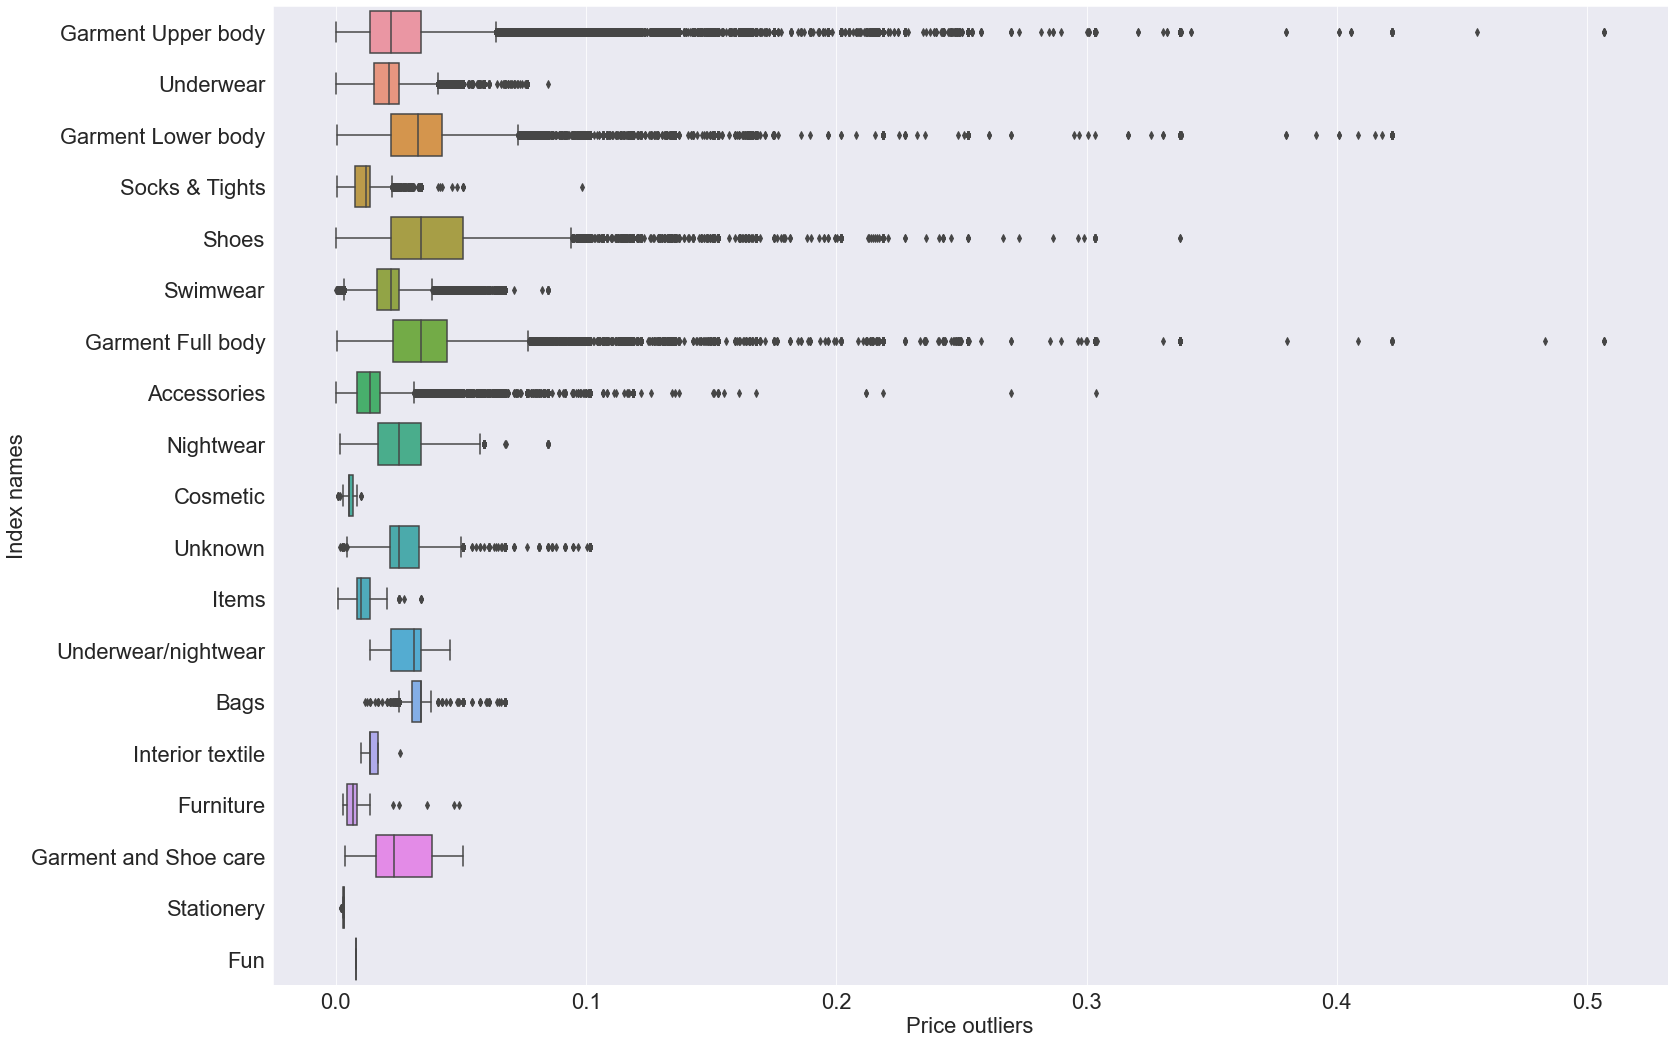

In [61]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

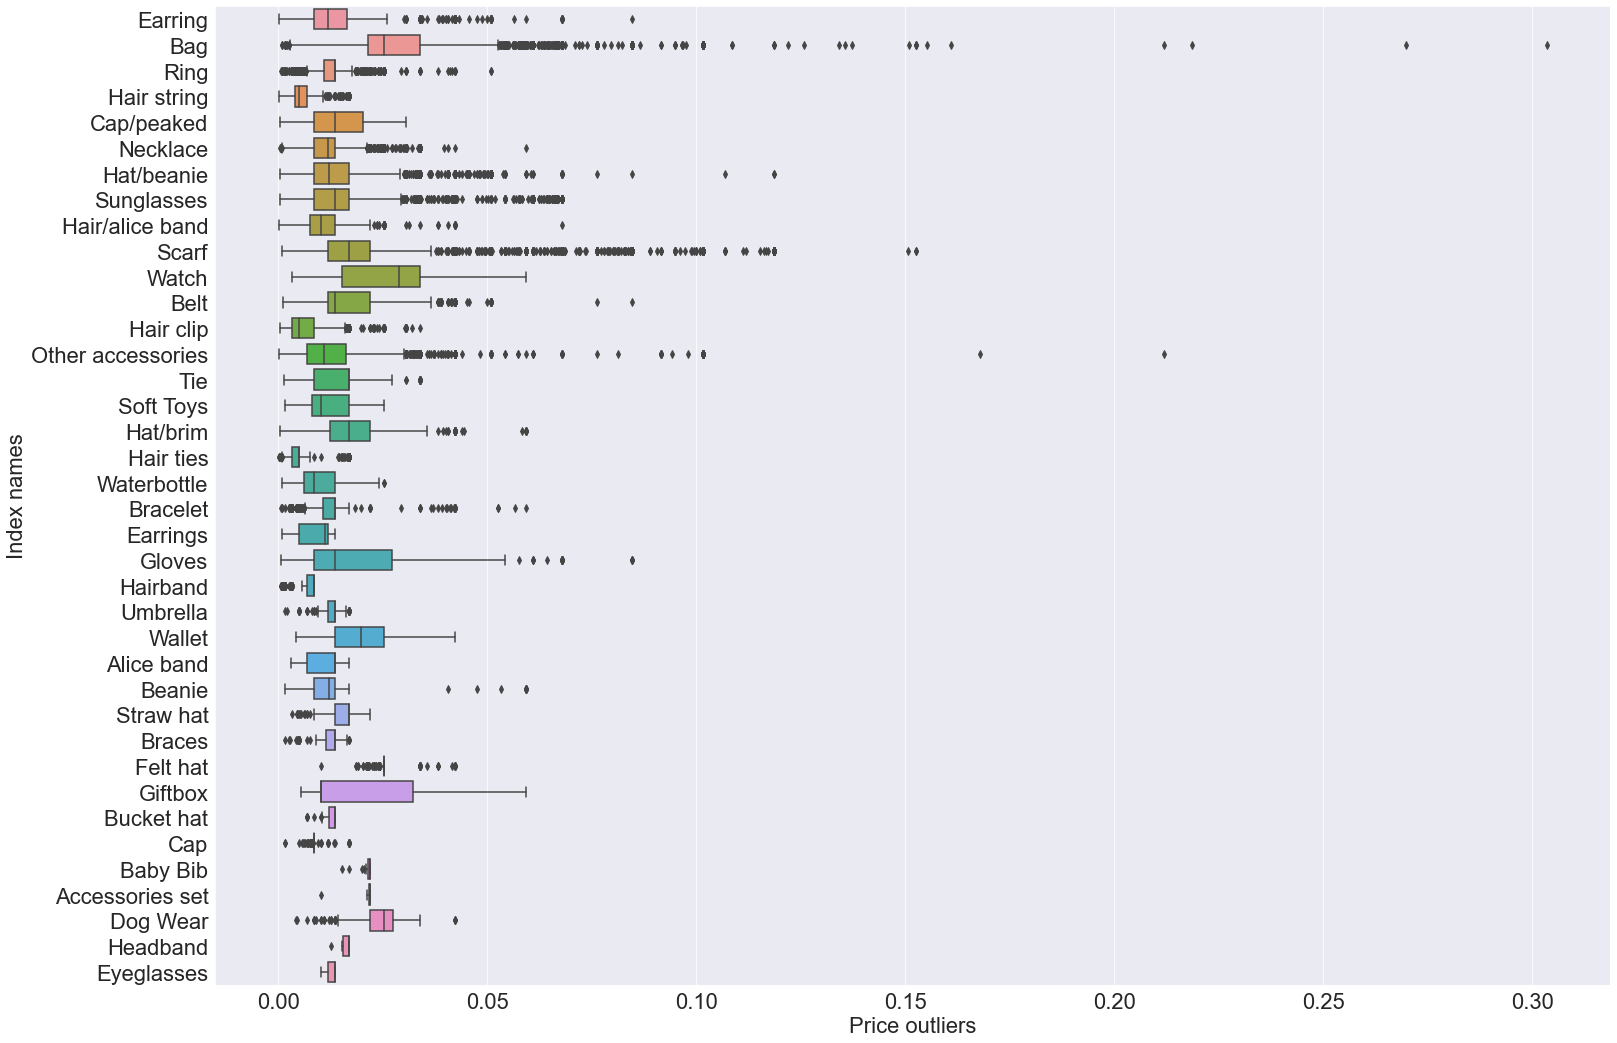

In [62]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
_ = articles_for_merge[articles_for_merge['product_group_name'] == 'Accessories']
ax = sns.boxplot(data=_, x='price', y='product_type_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
del _

plt.show()


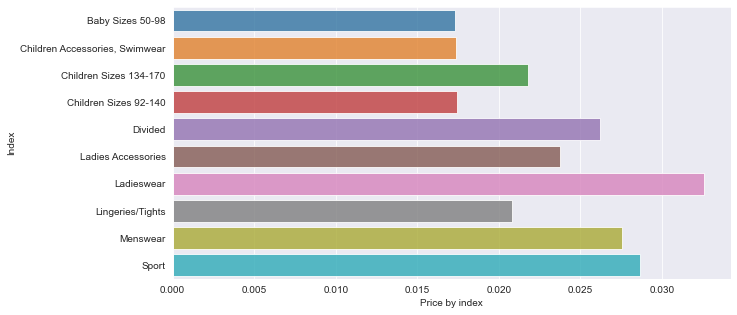

In [63]:
articles_index = articles_for_merge[['index_name', 'price']].groupby('index_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, alpha=0.8)
ax.set_xlabel('Price by index')
ax.set_ylabel('Index')
plt.show()

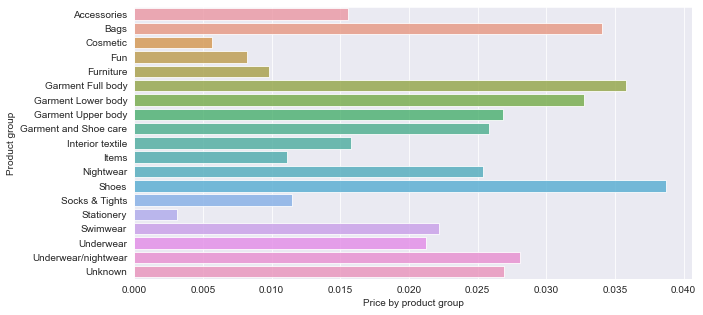

In [64]:
articles_index = articles_for_merge[['product_group_name', 'price']].groupby('product_group_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, alpha=0.8)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')
plt.show()

In [65]:
articles_for_merge['t_dat'] = pd.to_datetime(articles_for_merge['t_dat'])

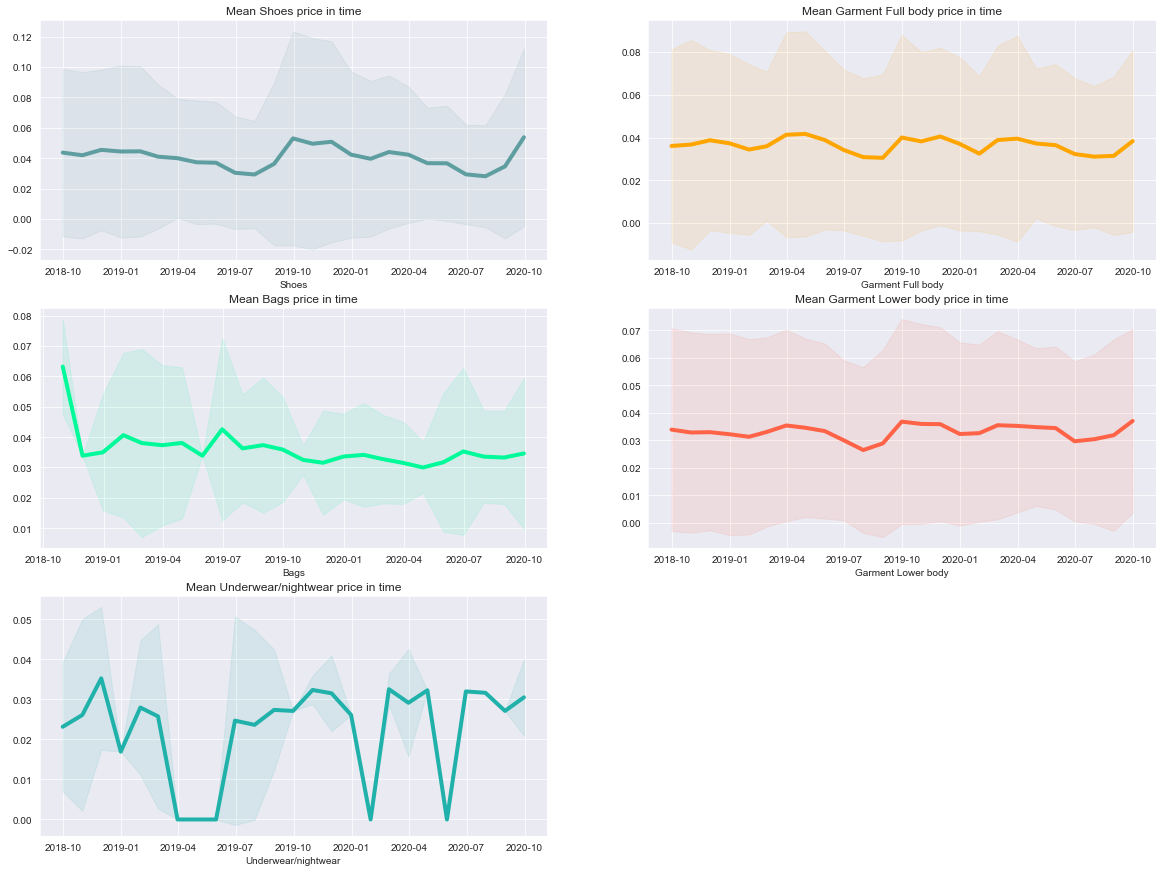

In [66]:
product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']
k = 0
f, ax = plt.subplots(3, 2, figsize=(20, 15))
for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == product_list[k]]
            series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                             (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean {product_list[k]} price in time')
            ax[i, j].set_xlabel('month')
            ax[i, j].set_xlabel(f'{product_list[k]}')
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
plt.show()

In [67]:
max_price_ids = transaction_subset_df[transaction_subset_df.t_dat==transaction_subset_df.t_dat.max()].sort_values('price', ascending=False).iloc[:5][['article_id', 'price']]
min_price_ids = transaction_subset_df[transaction_subset_df.t_dat==transaction_subset_df.t_dat.min()].sort_values('price', ascending=True).iloc[:5][['article_id', 'price']]

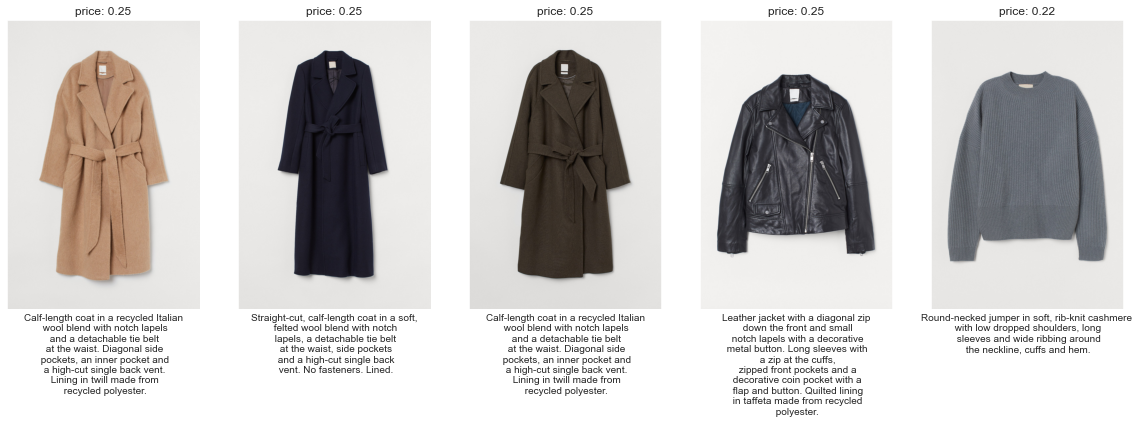

In [68]:
f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in max_price_ids.iterrows():
    desc = article_subset_df[article_subset_df['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 5 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'D://Education//MS DS NEU//Unsupervised Machine Learning//h-and-m-personalized-fashion-recommendations//images//0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.2f}')
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    ax[i].set_xlabel(desc, fontsize=10)
    i += 1
plt.show()

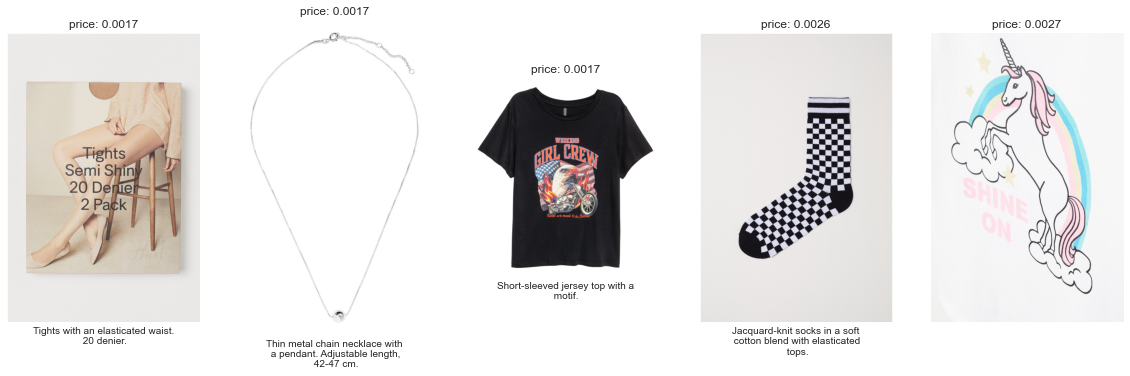

In [69]:
f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in min_price_ids.iterrows():
    desc = article_subset_df[article_subset_df['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 4 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'D://Education//MS DS NEU//Unsupervised Machine Learning//h-and-m-personalized-fashion-recommendations//images//0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.4f}')
    ax[i].set_xlabel(desc, fontsize=10)
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    i += 1
plt.axis('off')
plt.show()

### Market Basket Analysis

In [70]:
def create_predictions_format(data):
    data["article_id"] = data["article_id"]#.apply(lambda x: adjust_id(x))
    all_preds = data.groupby("customer_id")["article_id"].unique().to_dict()
    data["preds"] = data["customer_id"].map(all_preds)
    data["preds"] = data["preds"].apply(lambda x: " ".join([str(y) for y in x]))
    data = data.groupby("customer_id")["preds"].first().reset_index()
    return data

def get_frequent_purchases(transactions, n=50):
    temp = transactions.groupby(["customer_id", "article_id"])["t_dat"].count().reset_index()
    temp.columns = ["customer_id", "article_id", "count"]
    temp2 = transactions.groupby(["customer_id"])["t_dat"].count().reset_index()
    temp2.columns = ["customer_id", "full_count"]
    temp = temp.merge(temp2, on="customer_id", how="left")
    temp["perc"] = (temp["count"] / temp["full_count"])*100
    temp = temp[temp["perc"] >= n].reset_index(drop=True)
    temp = create_predictions_format(temp)
    return temp

In [71]:
transactions=pd.DataFrame()
transactions['customer_id'] = transaction_subset_df['customer_id'].str[-16:]
transactions['t_dat'] = pd.to_datetime(transaction_subset_df['t_dat'])
transactions = transaction_subset_df[['t_dat','customer_id','article_id']]

In [72]:
TOP_CUSTOMERS = 300000
TOP_N = 200

In [73]:
most_frequent_articles = transactions["article_id"].value_counts().reset_index()
most_frequent_articles.columns = ["article_id", "count"]
print("Total Unique IDs in Transactions:", len(most_frequent_articles))
print("Total Unique IDs that are selected:", TOP_N)
most_frequent_articles = np.asarray(most_frequent_articles.head(TOP_N)["article_id"])
transactions = transactions[transactions["article_id"].isin(most_frequent_articles)].reset_index(drop=True)

Total Unique IDs in Transactions: 86307
Total Unique IDs that are selected: 200


In [74]:
customers_top_trans = list(transactions["customer_id"].value_counts().reset_index().head(TOP_CUSTOMERS)["index"].unique())
transactions = transactions[transactions["customer_id"].isin(customers_top_trans)].reset_index(drop=True)
print("Total unique users to recommend:", transactions["customer_id"].nunique())

Total unique users to recommend: 63170


In [75]:
temp = get_frequent_purchases(transactions, n=50)
temp.head(12)

,customer_id,preds
0,0001076e215991bad544dd3e7312f78d9f576a1cc3ddc4...,715624001
1,0001f8cef6b9702d54abf66fd89eb21014bf98567065a9...,739144004
2,000226b9ea81019249060b376b516f821a80e9b24f89a7...,590928001 759871002
3,00022754ec18c5e53757eea8b281632a5c4a499368ecc5...,573716012 720125001
4,0005c68366e7955683b7cdc75535f400d76c2e713b6277...,741356002
5,0006ca2c5ecdbdcc1de5e72adffc6c33448fc2aaa62afe...,448509001 572998001
6,0006d8845db202dc43bd6ed3d74702df026b13fc1517c9...,611415001 611415005
7,000c5c714aefd0d5ed1205e2781070167826ffc117ab9e...,399256005 579541001
8,000c6acfc0457b99ae3150e8e57beffb4c8d7c5fc31e40...,579541001 803757001
9,000ce5da167c6c8dfaea6dfc4b59a5ea3217630ec36cfc...,618800001 741356002


In [76]:
del most_frequent_articles, customers_top_trans

In [77]:
gc.collect()

26917